<a href="https://colab.research.google.com/github/rup-ak/Number_Plate_Recognition_System/blob/main/ANPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Install and Import Dependencies

In [ ]:
!pip install easyocr
!pip install imutils
!pip install matplotlib

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import easyocr
import imutils
import numpy as np

2. Read an image in grayscale and Blur

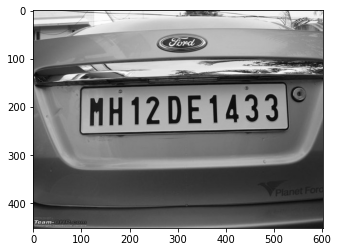

In [265]:
img=cv.imread('/content/img1.jpeg')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(gray,cv.COLOR_BGR2RGB))

3. Apply filter and find edges for localization

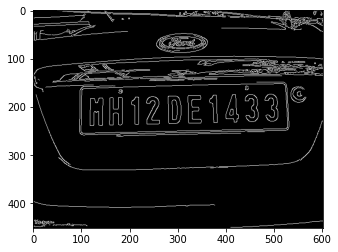

In [266]:
bfilter=cv.bilateralFilter(gray,11,17,17) #filter and noise reduction
edge=cv.Canny(bfilter,100,250)  #eadge detection
plt.imshow(cv.cvtColor(edge,cv.COLOR_BGR2RGB))

4. Find conturs and Apply Mask

In [267]:
keypoints=cv.findContours(edge.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours, key=cv.contourArea, reverse=True)[:10]

In [268]:
location=None
for contour in contours:
  approx=cv.approxPolyDP(contour, 10, True)
  if len(approx)==4:
    location=approx
    break

In [269]:
location

array([[[524, 157]],

       [[106, 162]],

       [[ 99, 251]],

       [[523, 246]]], dtype=int32)

In [270]:
mask=np.zeros(gray.shape,np.uint8)
crop=cv.drawContours(mask, [location],0, 255, -1)
crop=cv.bitwise_and(img, img, mask=mask)

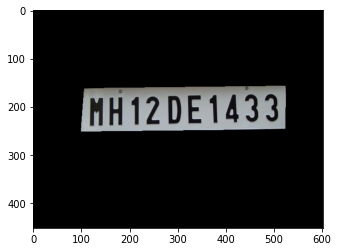

In [271]:
plt.imshow(cv.cvtColor(crop, cv.COLOR_BGR2RGB))

In [272]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))

croped=gray[x1:x2+1, y1:y2+1]

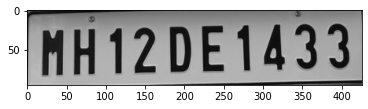

In [273]:
plt.imshow(cv.cvtColor(croped,cv.COLOR_BGR2RGB))

5. Use easy OCR to Read Text

In [274]:
reader=easyocr.Reader(['en'])
result= reader.readtext(croped)
result

[([[6, 4], [424, 4], [424, 95], [6, 95]], 'MHI2 DE1433', 0.6472645233597478)]

6. Render Result

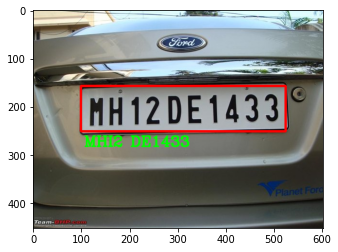

In [275]:
text=result[0][-2]
font=cv.FONT_HERSHEY_COMPLEX
res=cv.putText(img, text=text, org=(approx[1][0][0], approx[1][0][1]+120),fontFace=font,fontScale=1,color=(0,255,0), thickness=2, lineType=cv.LINE_AA)
res=cv.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,0,255),3)
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))